Question #5 (100 points): Implement K-means algorithm for Iris dataset when k=2, 6, and 10.

The accuracy of the K-Means algorithm with k = 2 is -1850.84


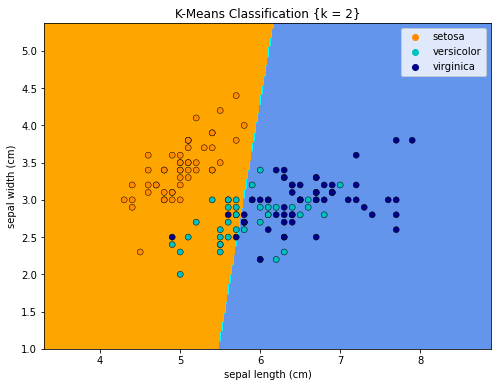

The accuracy of the K-Means algorithm with k = 6 is -660.12


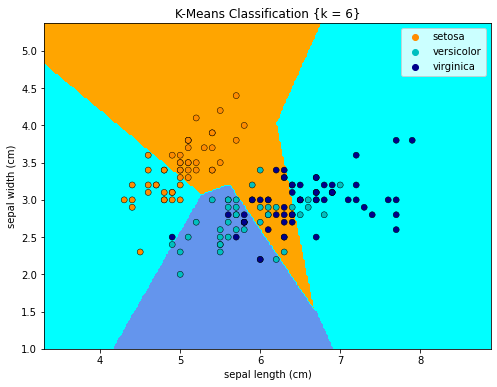

The accuracy of the K-Means algorithm with k = 10 is -386.72


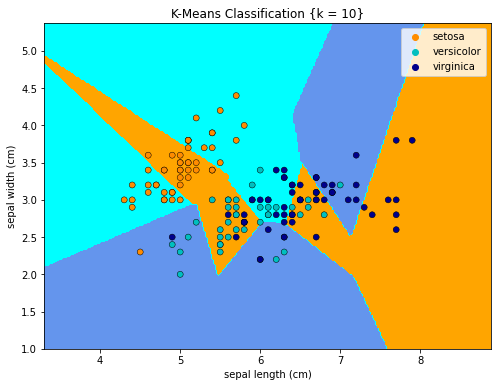

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

n_neighbors_list = [2, 6, 10]
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

iris = datasets.load_iris()

x = iris.data[:, :2]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

for k in n_neighbors_list:
    #kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(x_train, y_train)
    print('The accuracy of the K-Means algorithm with k = %d is {:.2f}'.format((kmeans.score(x_test, y_test) * 100)) % k)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, cmap=cmap_light)
    
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("K-Means Classification {k = %i}" % k)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    
    plt.show()